Predictive Analytics menggunakan Data Weather Type Classification


# Data Loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
# Load data
!pip install kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d nikhil7280/weather-type-classification
!unzip weather-type-classification.zip


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/nikhil7280/weather-type-classification
License(s): other
  0% 0.00/186k [00:00<?, ?B/s]
100% 186k/186k [00:00<00:00, 55.2MB/s]
Archive:  weather-type-classification.zip
  inflating: weather_classification_data.csv  


In [3]:
cuaca = pd.read_csv('weather_classification_data.csv')
cuaca.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


# Exploratory Data Analysis

In [4]:
cuaca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


## Mengubah Type data

In [5]:
# ubah data Weather Type menjadi numerik
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cuaca['Weather Type'] = le.fit_transform(cuaca['Weather Type'])
cuaca.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,1
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,0
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,3
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,3
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,1


Mengubah data Weather Type menjadi numerik karena fitur ini akan menjadi target prediksi kita
Mengubahnya menjadi numerik akan mempermudah pengambilan keputusan

0 = Cloudy
1 = Rainy
2 = Snowy
3 = Sunny

In [6]:
# update data
cuaca.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917,1.500000
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499,1.118076
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000,0.750000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000,1.500000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000,2.250000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000,3.000000


## Menangani Outliers


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


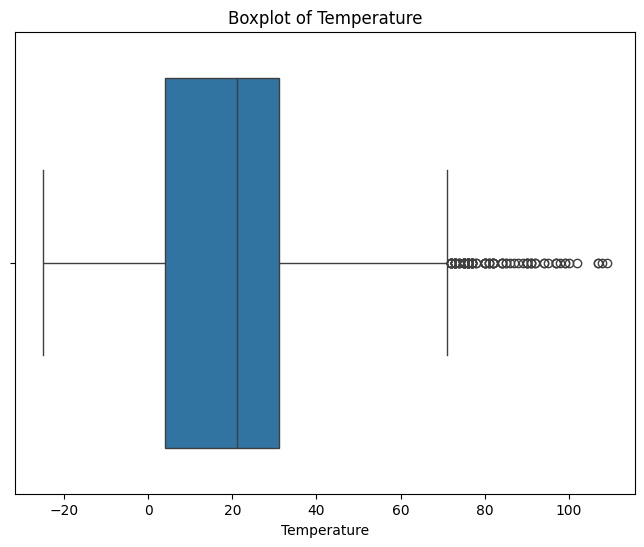

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


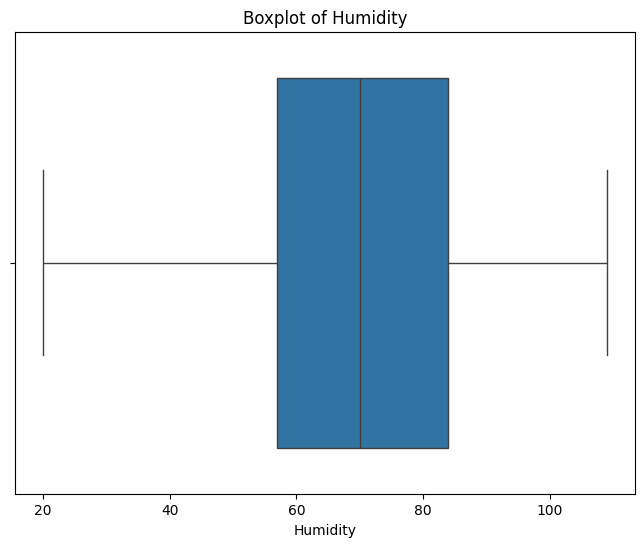

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


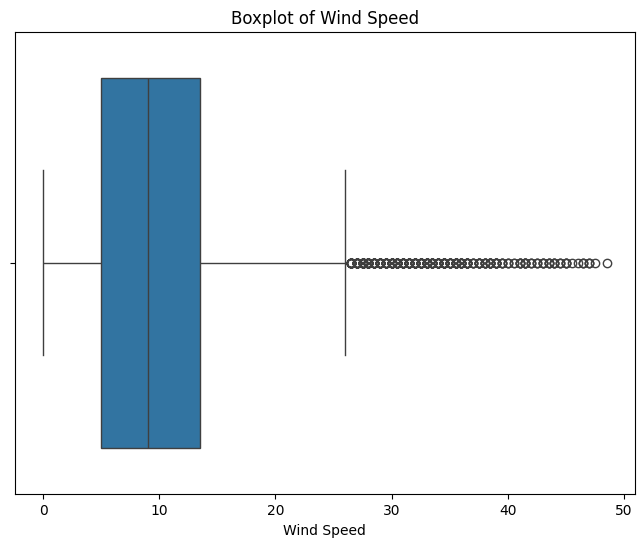

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


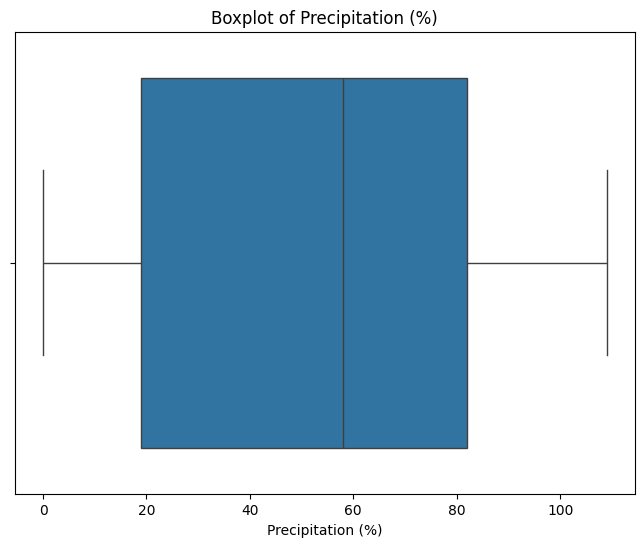

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


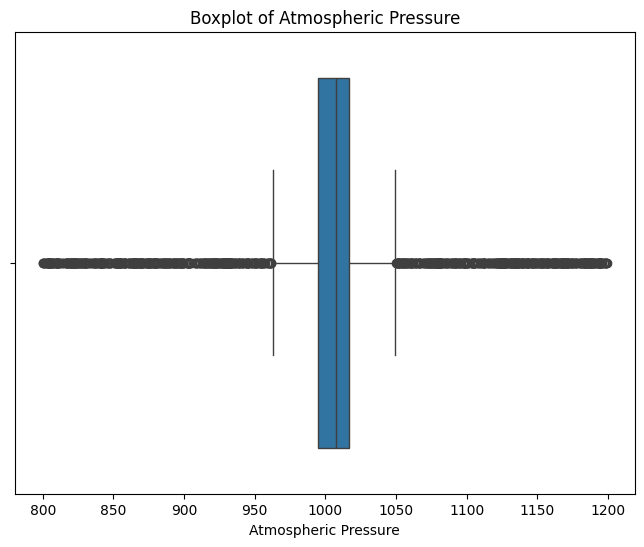

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


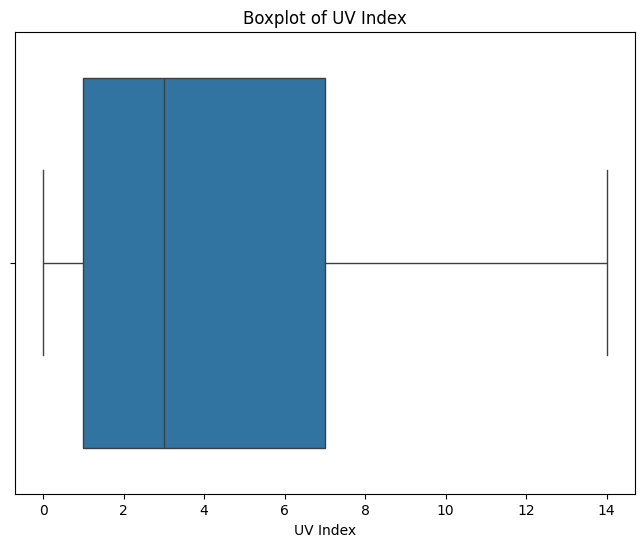

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


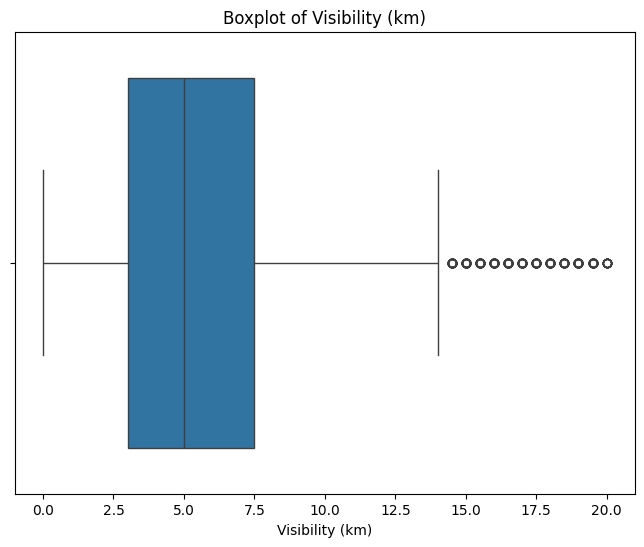

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


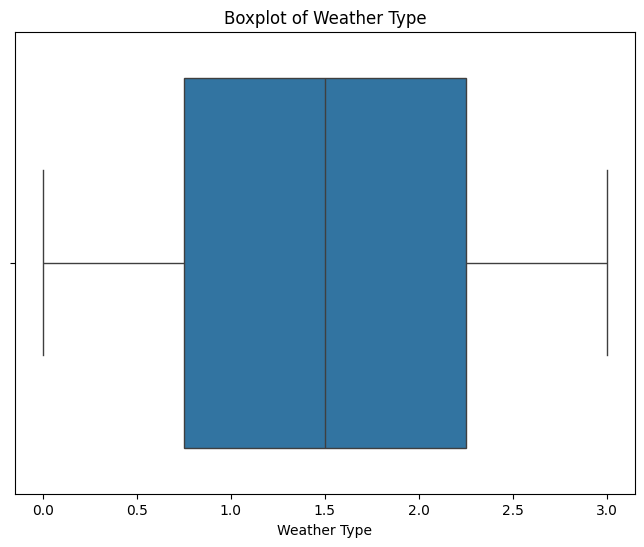

In [7]:
#menampilkan data outlier

import numpy as np
import matplotlib.pyplot as plt

# Loop through numerical columns and create boxplots
for column in cuaca.select_dtypes(include=np.number).columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=cuaca[column])
  plt.title(f'Boxplot of {column}')
  plt.show()


In [8]:
# Menghitung Q1 dan Q3 untuk kolom numerik
for column in cuaca.select_dtypes(include=np.number).columns:
  Q1 = cuaca[column].quantile(0.25)
  Q3 = cuaca[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outlier_count = len(cuaca[(cuaca[column] < lower_bound) | (cuaca[column] > upper_bound)])
  print(f"Jumlah outlier di kolom '{column}': {outlier_count}")


Jumlah outlier di kolom 'Temperature': 92
Jumlah outlier di kolom 'Humidity': 0
Jumlah outlier di kolom 'Wind Speed': 404
Jumlah outlier di kolom 'Precipitation (%)': 0
Jumlah outlier di kolom 'Atmospheric Pressure': 927
Jumlah outlier di kolom 'UV Index': 0
Jumlah outlier di kolom 'Visibility (km)': 383
Jumlah outlier di kolom 'Weather Type': 0


Berdasarkan jumlah outlier, jika dijumlahkan datanya ada 1806 atau 13,6% dari total 13200 data.
jika dihapus akan mengurangi data lumayan banyak.
Saya mengganti nilai di kolom tertentu yang berada di luar batas atas dan bawah dengan nilai median kolom tersebut agar tidak menghilangkan niali outliernya dan tidak membuang data

In [9]:
import numpy as np

# Fungsi untuk mengganti outlier dengan median berdasarkan batas yang ditentukan
def replace_outliers(df, column, upper_limit, lower_limit=None):
    if lower_limit is None:
        lower_limit = df[column].min()  # Menggunakan nilai minimum kolom jika tidak ada batas bawah
    median_value = df[column].median()  # Menghitung median kolom
    df[column] = np.where((df[column] < lower_limit) | (df[column] > upper_limit), median_value, df[column])
    return df

# Menangani outlier pada setiap kolom sesuai batas yang sudah ditentukan
cuaca = replace_outliers(cuaca, 'Temperature', upper_limit=50)  # Mengganti suhu > 50°C dengan median
cuaca = replace_outliers(cuaca, 'Humidity', upper_limit=100)  # Mengganti kelembaban > 100% dengan median
cuaca = replace_outliers(cuaca, 'Wind Speed', upper_limit=25)  # Mengganti kecepatan angin > 25 m/s dengan median
cuaca = replace_outliers(cuaca, 'Precipitation (%)', upper_limit=100)  # Mengganti curah hujan > 100% dengan median
cuaca = replace_outliers(cuaca, 'Atmospheric Pressure', upper_limit=1060, lower_limit=970)  # Mengganti tekanan udara di luar 970-1060 hPa dengan median
cuaca = replace_outliers(cuaca, 'Visibility (km)', upper_limit=15)  # Mengganti visibilitas > 15 km dengan median

# Mengecek deskripsi ulang data setelah penggantian
print(cuaca.describe())


        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      17.923788     67.602424      9.052462          52.248939   
std       15.444926     19.092990      5.398776          30.670579   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       30.000000     81.000000     13.000000          79.000000   
max       50.000000    100.000000     25.000000         100.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  Weather Type  
count          13200.000000  13200.000000     13200.000000  13200.000000  
mean            1006.426274      4.005758         5.165568      1.500000  
std               12.659835      3.856600         2.789526      1.118076  
min              970.480000      0.000000         0.000000      0.000

## Univariate Analysis

In [10]:
# bagi menjadi 2 fitur
numerical_features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)', 'Weather Type']
categorical_features = ['Cloud Cover', 'Season', 'Location']


### Categorical Features

               jumlah sampel  persentase
Cloud Cover                             
overcast                6090        46.1
partly cloudy           4560        34.5
clear                   2139        16.2
cloudy                   411         3.1


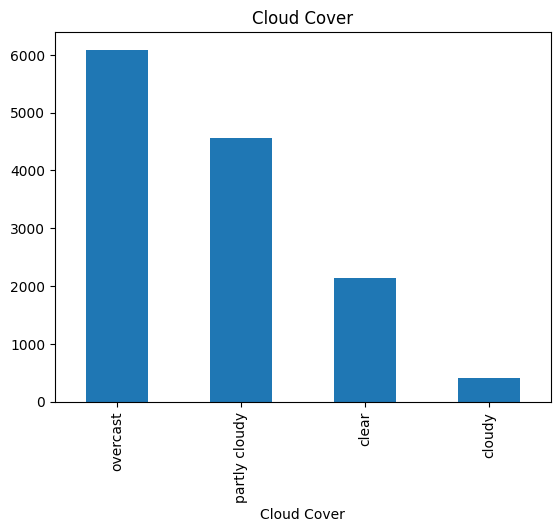

In [11]:
# Fitur CLoud Cover
feature = categorical_features[0]
count = cuaca[feature].value_counts()
percent = 100*cuaca[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

        jumlah sampel  persentase
Season                           
Winter           5610        42.5
Spring           2598        19.7
Autumn           2500        18.9
Summer           2492        18.9


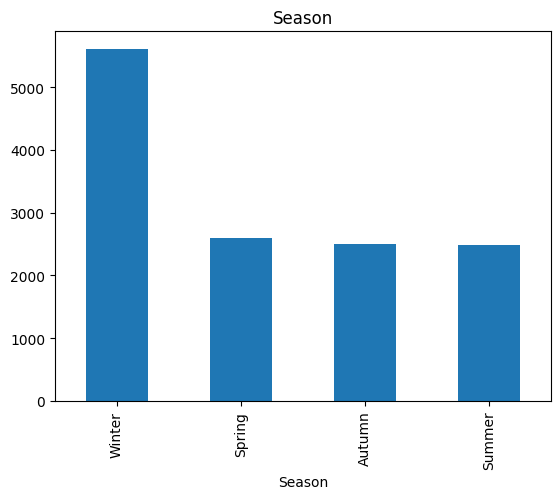

In [12]:
# Fitur Season
feature = categorical_features[1]
count = cuaca[feature].value_counts()
percent = 100*cuaca[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

          jumlah sampel  persentase
Location                           
inland             4816        36.5
mountain           4813        36.5
coastal            3571        27.1


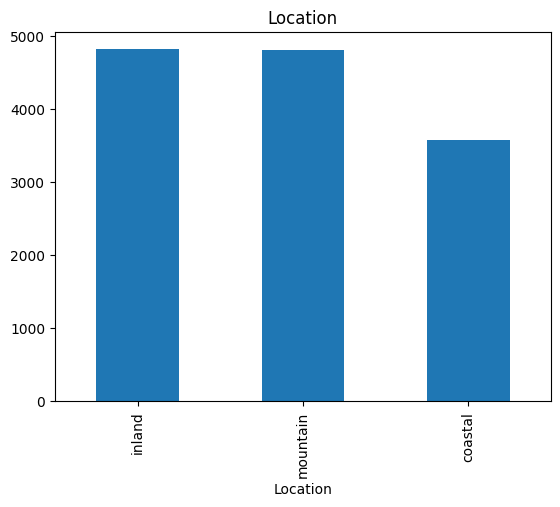

In [13]:
# Fitur Location
feature = categorical_features[2]
count = cuaca[feature].value_counts()
percent = 100*cuaca[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

### Numerical Features

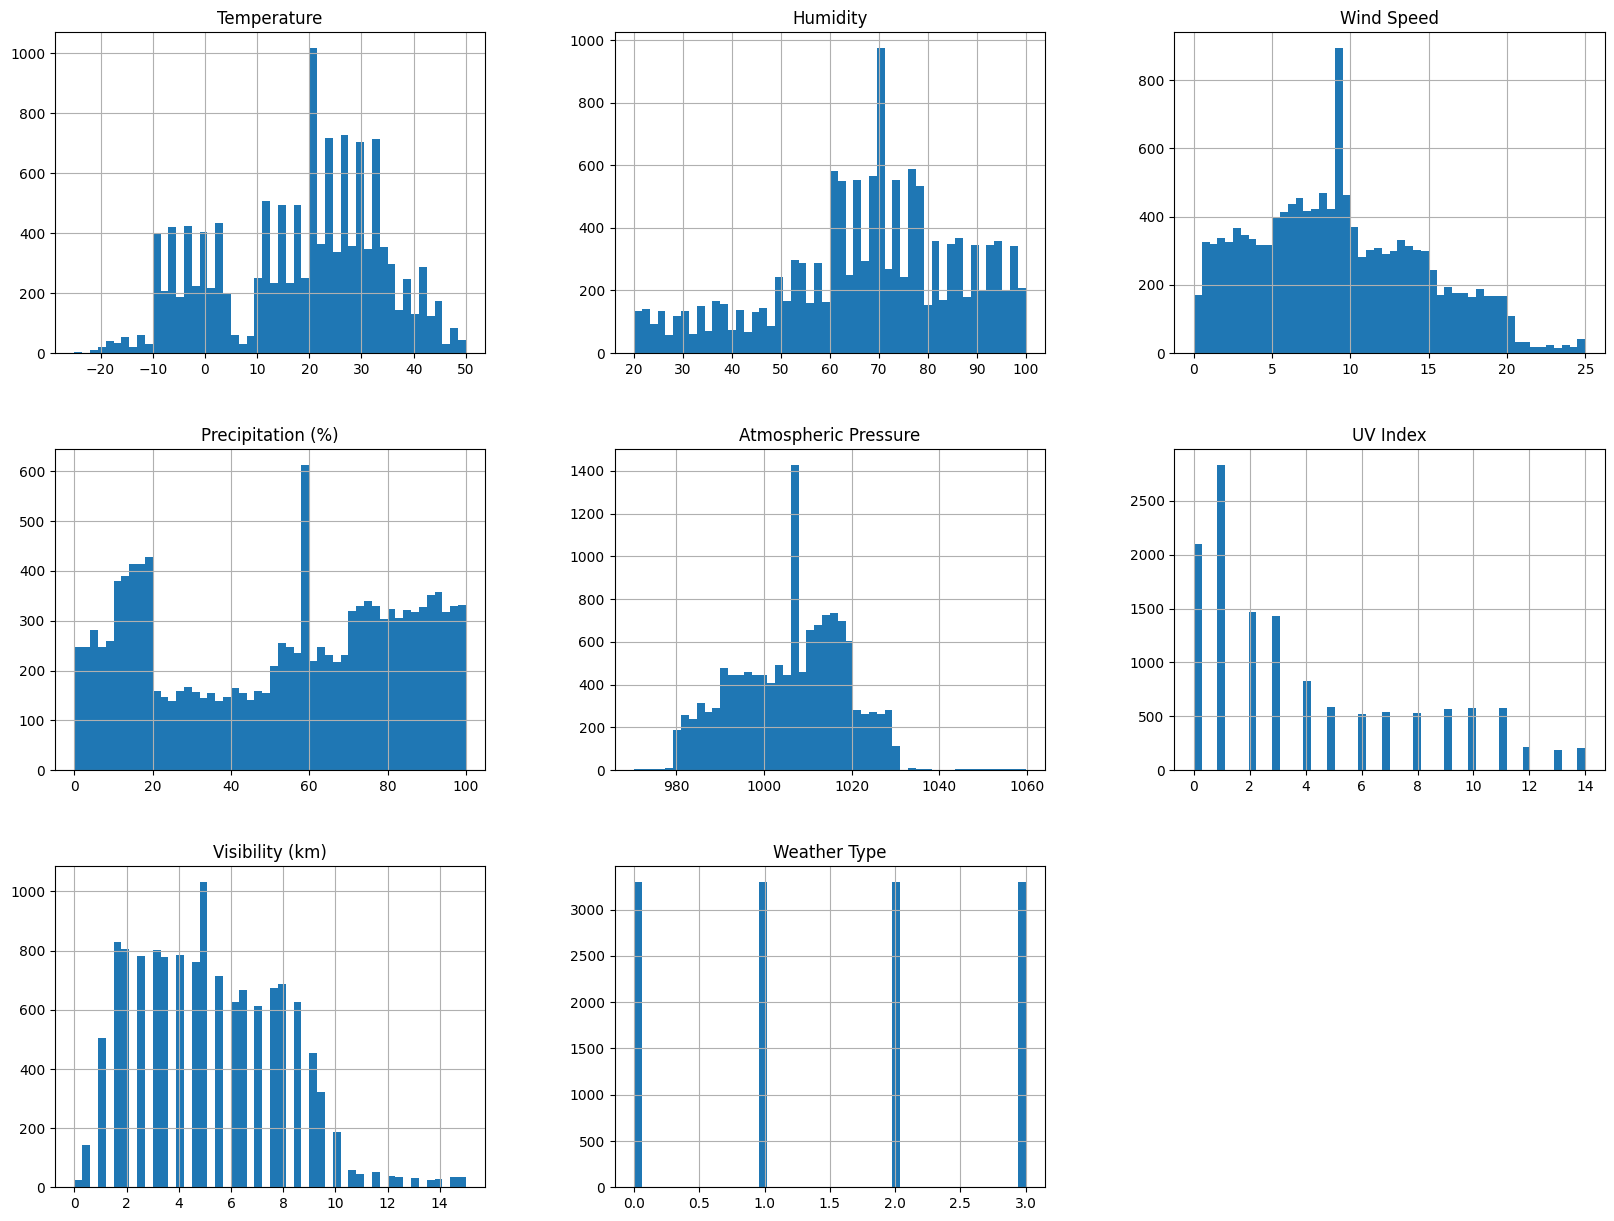

In [14]:
cuaca.hist(bins=50, figsize=(20,15))
plt.show()

## Multivariate Analysis

### Categorical Features



<ipython-input-15-f62e079941a7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Weather Type", kind="bar", dodge=False, height = 4, aspect = 3,  data=cuaca, palette="Set3")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base

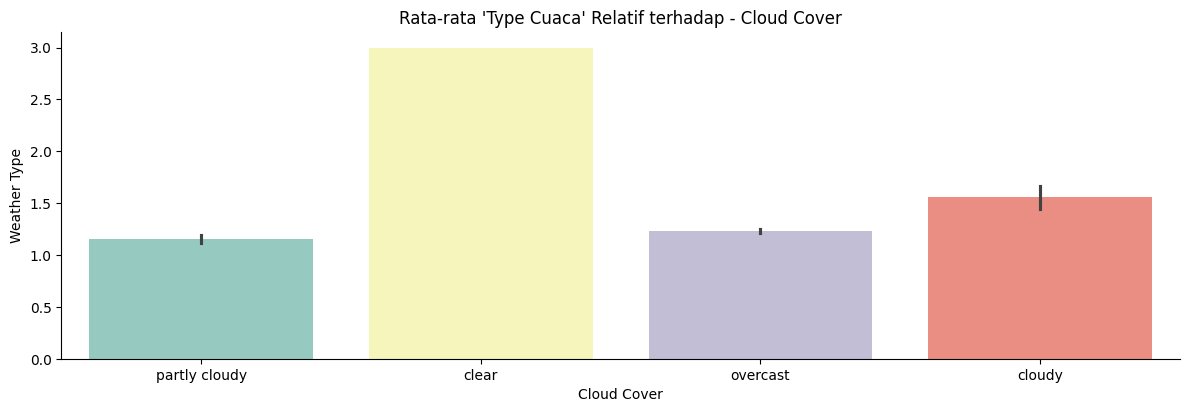

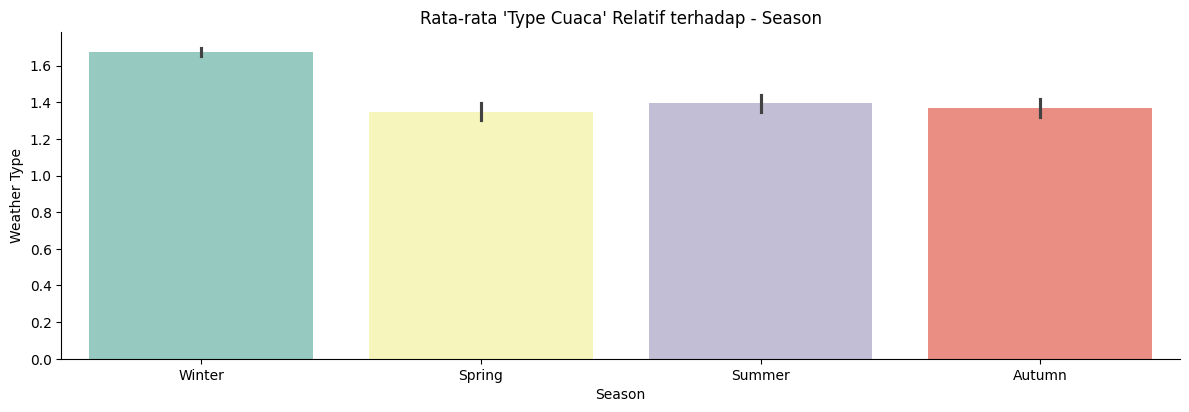

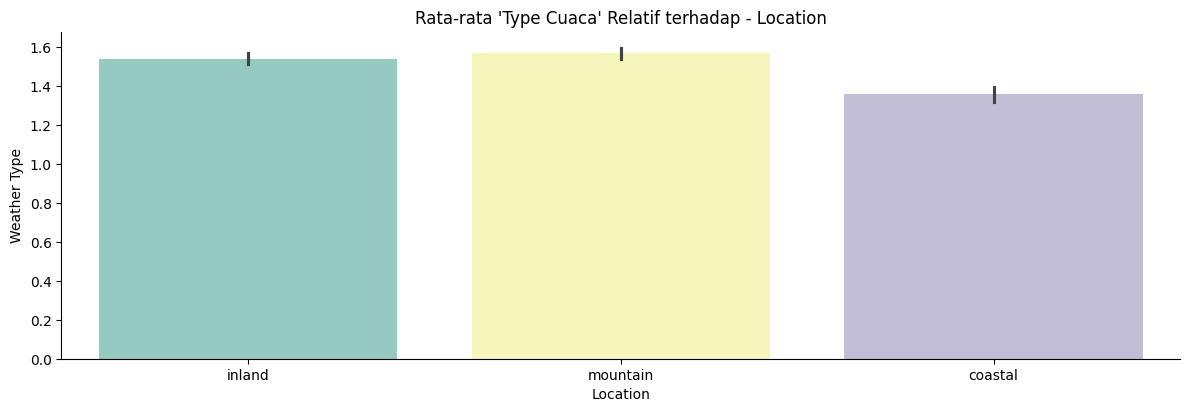

In [15]:
cat_features = cuaca.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="Weather Type", kind="bar", dodge=False, height = 4, aspect = 3,  data=cuaca, palette="Set3")
  plt.title("Rata-rata 'Type Cuaca' Relatif terhadap - {}".format(col))

berdasarkan data grafik di atas:
1. Pada fitur 'Cloud Cover', ada perbedaan signifikan pada kategori clear yang menandakan adanya hubungan antara 'Cloud Cover' dengan 'Weather Type'
2. Pada fitur 'Season', rata-rata Tipe cuaca yang muncul hampir sama di kisaran 1,2 - 1,6 menandakan hubungan 'Season' dengan 'Weather Type' rendah
3. Pada fitur 'Location', rata-rata Tipe cuaca yang juga hampir mirip. Ini juga menandakan rendahnya hubungan antara fitur 'Location' dan 'Weather Type'



In [16]:
# Ubah menjadi numerik
cuaca1 = cuaca.copy() # buat kopian data agar data asli tidak berubah
le = LabelEncoder()
for feature in ['Cloud Cover', 'Season', 'Location']:
  cuaca1[feature] = le.fit_transform(cuaca[feature])

cuaca1.head()


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73.0,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96.0,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64.0,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83.0,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74.0,17.0,66.0,2,990.67,1,3,2.5,2,1


Untuk melihat hubungan fitur kategori dengan Weather Type terutama pada fitur 'Cloud COver', saya ubah menjadi data numerik dan melihat korelasinya

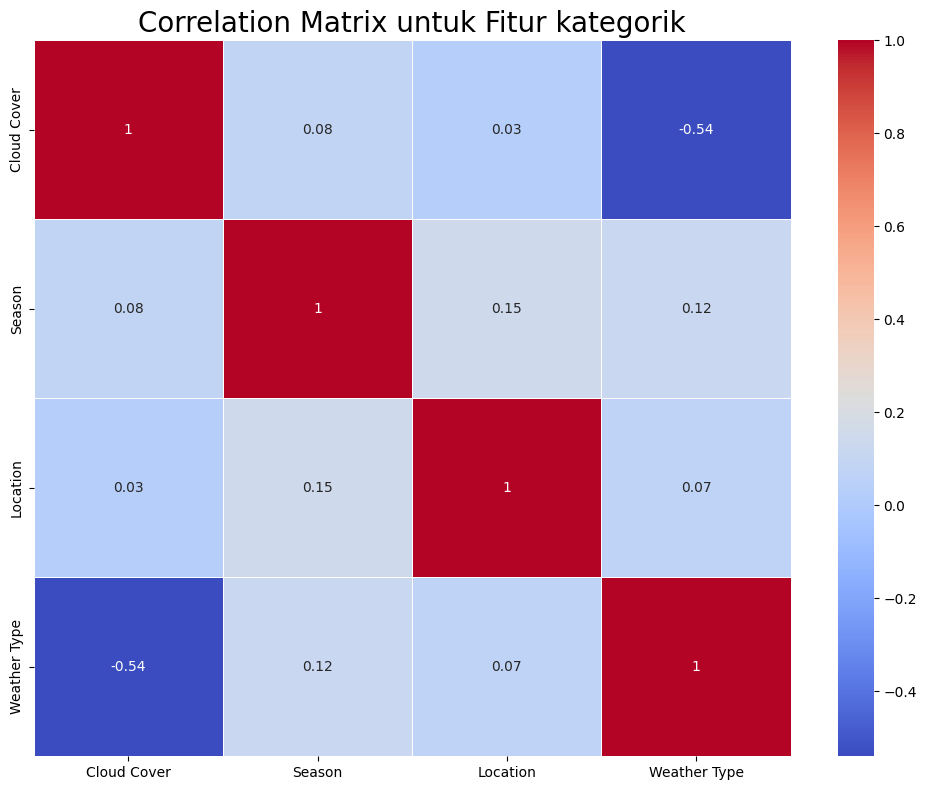

In [17]:
# Mengetahui skor korelasi
plt.figure(figsize=(10, 8))
correlation_matrix = cuaca1[['Cloud Cover', 'Season', 'Location', 'Weather Type']].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur kategorik", size=20)
plt.tight_layout()

Dari hasil cek korelasi di atas benar prediksi daya jika Cloud Cover memiliki korelasi -0,54 dengan Weather Type. Karena bernilai negatif, ini menandakan bahwa semakin tinggi tingkat awan (mendung), semakin buruk jenis cuaca yang diprediksi, dan sebaliknya. Hubungan ini berkebalikan dengan data dan akan kita abaikan

### Numerical Features

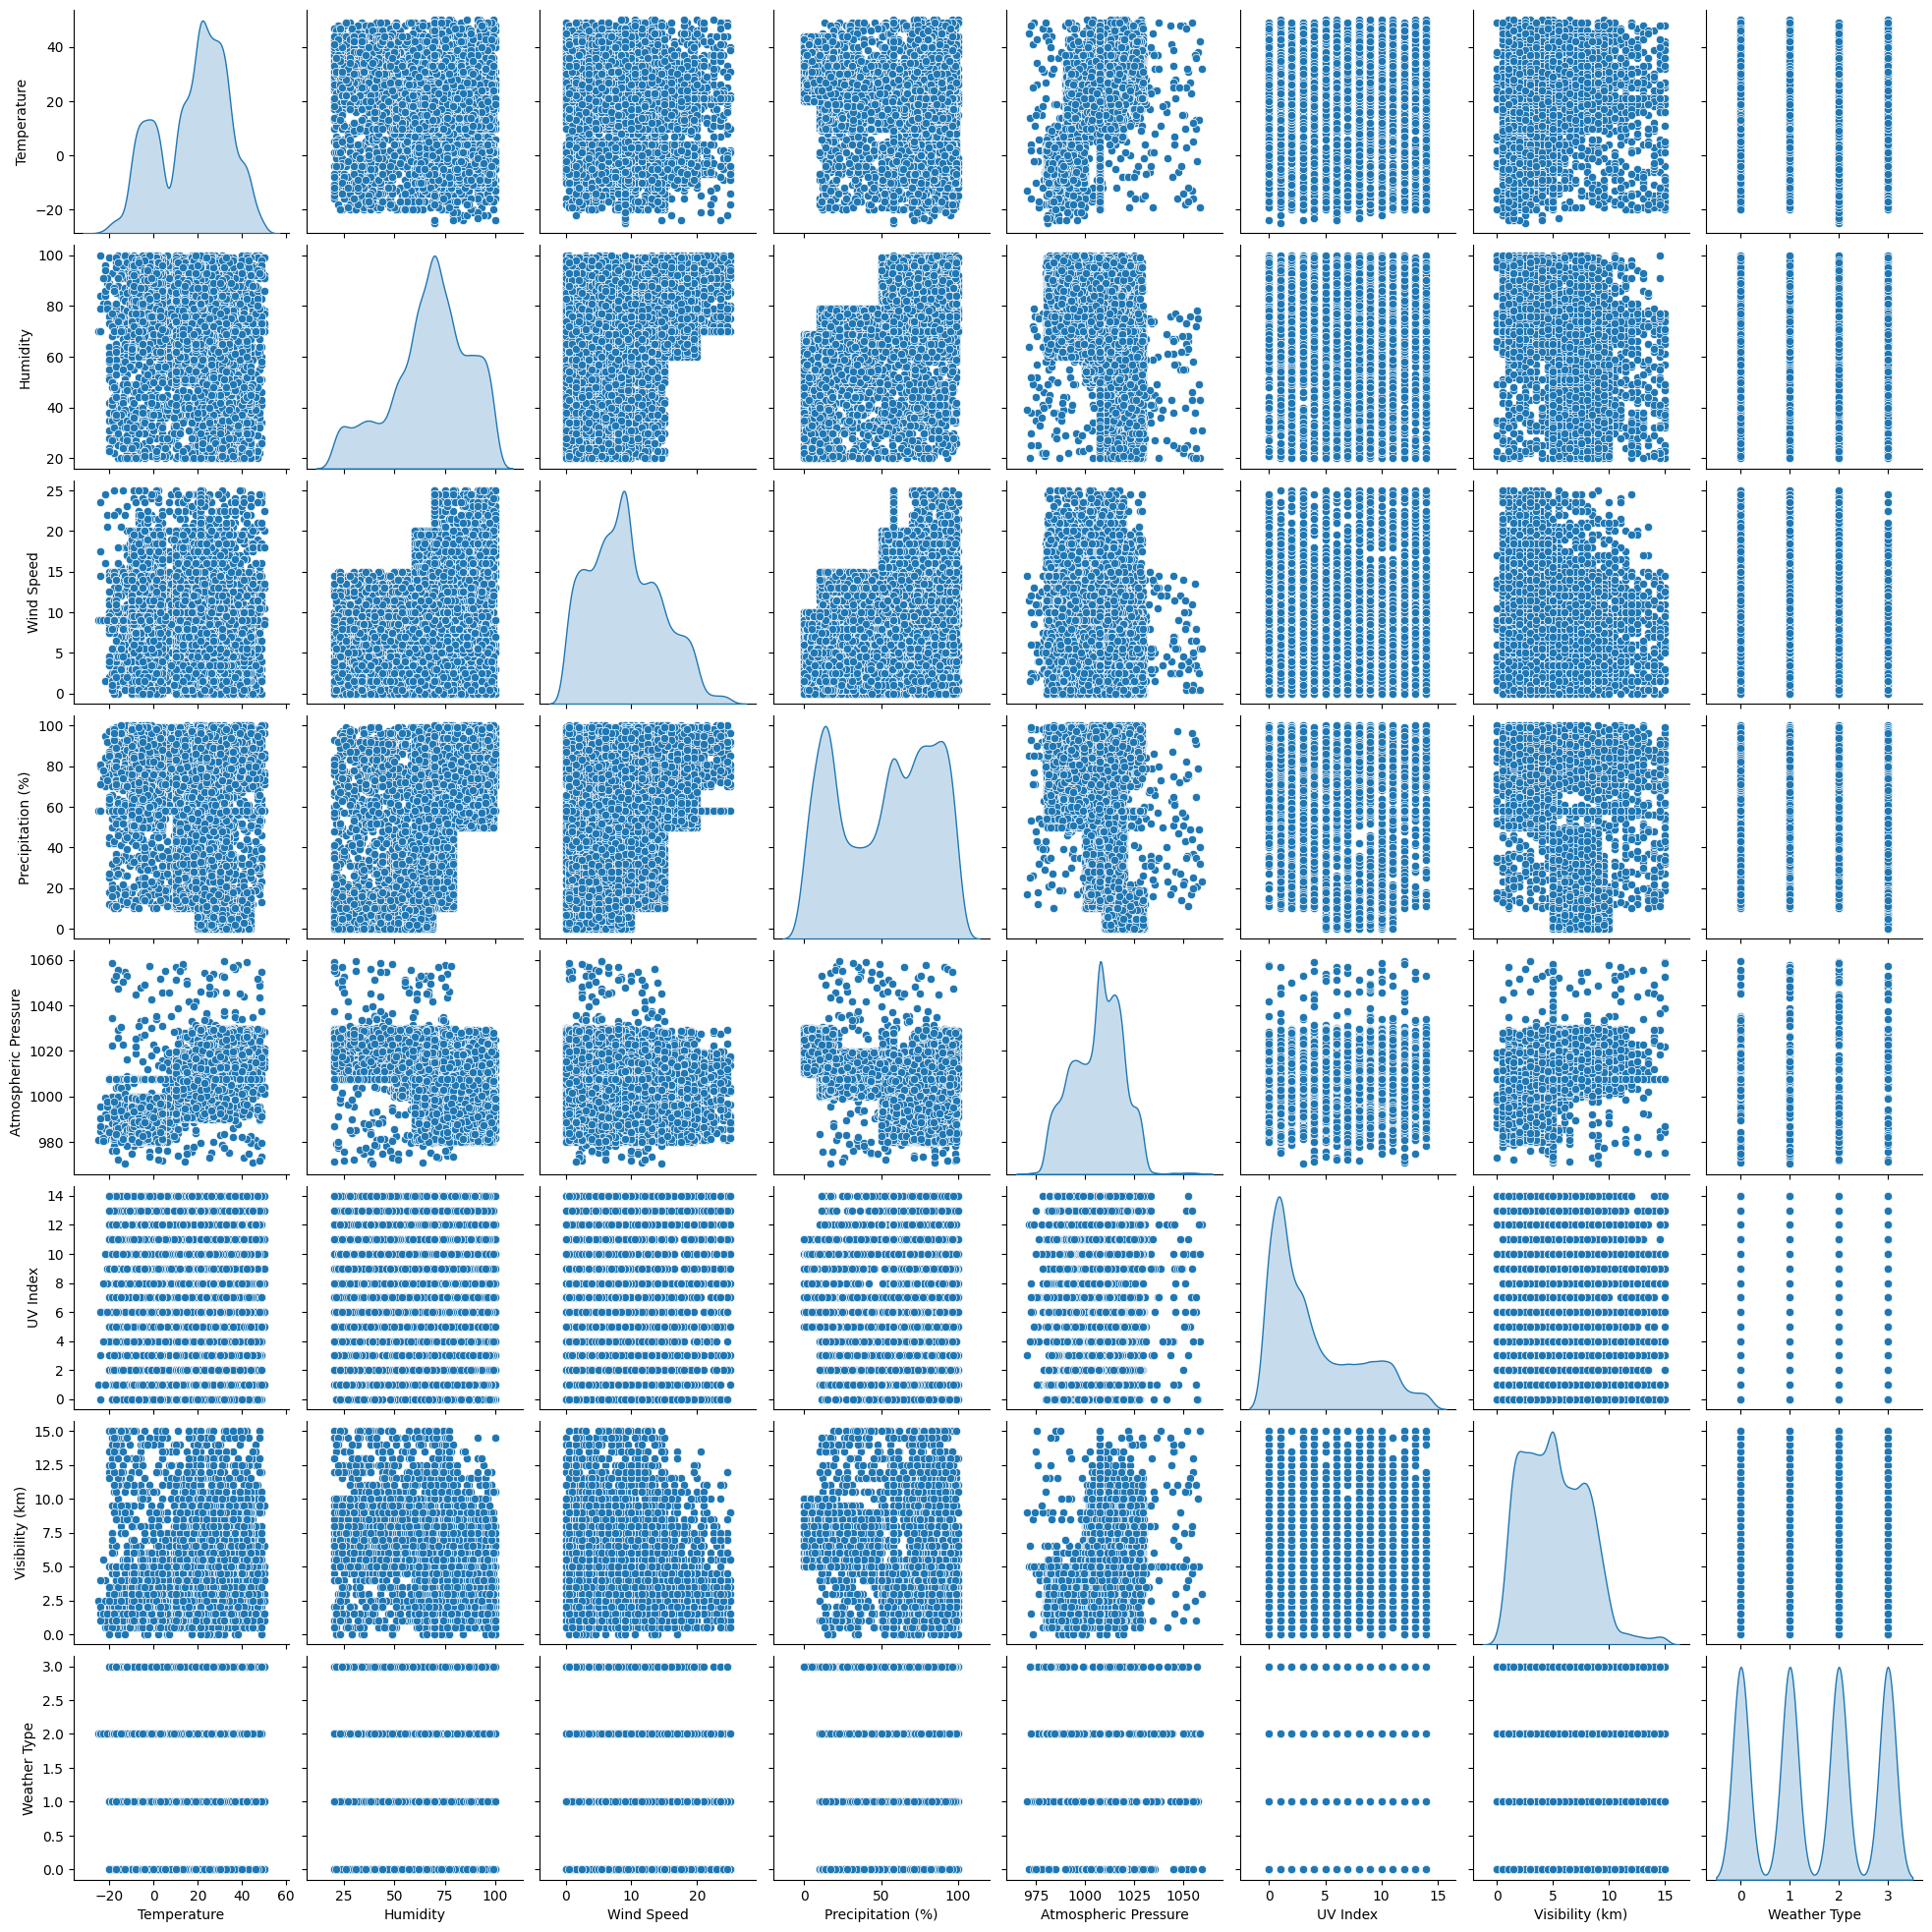

In [18]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(cuaca, diag_kind = 'kde')

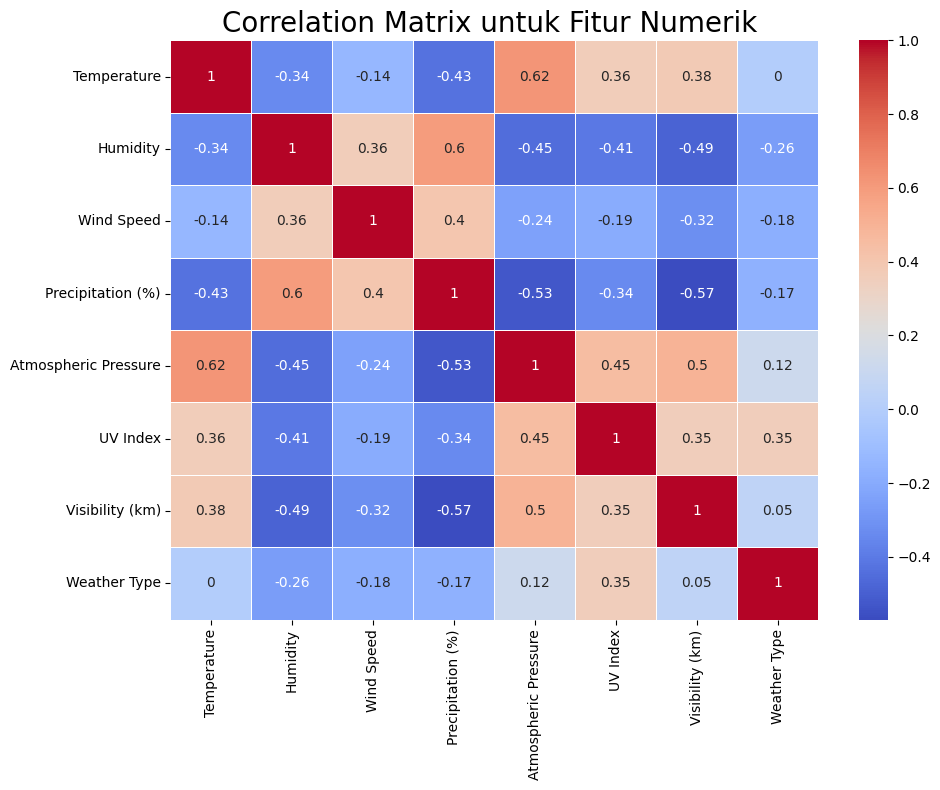

In [19]:
# Mengetahui skor korelasi
plt.figure(figsize=(10, 8))
correlation_matrix = cuaca[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)
plt.tight_layout()

Berdasarkan nilai korelasi di atas
- UV index menjadi fitur yang paling mempengaruhi Tipe Cuaca
- Temperature dan Visibilty adalah fitur yang tidak mempunya korelasi dengan tipe cuaca dan akan di hapus

In [20]:
# Ada beberapa yang tidak memilik korelasi dengan Weather Type, maka kita hilangkan saja
cuaca.drop(['Temperature', 'Visibility (km)'], inplace=True, axis=1)
cuaca.head()

,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Location,Weather Type
0,73.0,9.5,82.0,partly cloudy,1010.82,2,Winter,inland,1
1,96.0,8.5,71.0,partly cloudy,1011.43,7,Spring,inland,0
2,64.0,7.0,16.0,clear,1018.72,5,Spring,mountain,3
3,83.0,1.5,82.0,clear,1026.25,7,Spring,coastal,3
4,74.0,17.0,66.0,overcast,990.67,1,Winter,mountain,1


In [21]:
cuaca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Humidity              13200 non-null  float64
 1   Wind Speed            13200 non-null  float64
 2   Precipitation (%)     13200 non-null  float64
 3   Cloud Cover           13200 non-null  object 
 4   Atmospheric Pressure  13200 non-null  float64
 5   UV Index              13200 non-null  int64  
 6   Season                13200 non-null  object 
 7   Location              13200 non-null  object 
 8   Weather Type          13200 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 928.2+ KB


# Data Preparation

## Encoding FItur Kategori

Ubah data kategori menjadi numerik dengan teknik one-hot encoding

In [22]:
from sklearn.preprocessing import  OneHotEncoder
cuaca = pd.concat([cuaca, pd.get_dummies(cuaca['Cloud Cover'], prefix='Cloud Cover')],axis=1)
cuaca = pd.concat([cuaca, pd.get_dummies(cuaca['Season'], prefix='Season')],axis=1)
cuaca = pd.concat([cuaca, pd.get_dummies(cuaca['Location'], prefix='Location')],axis=1)
cuaca.drop(['Cloud Cover','Season','Location'], axis=1, inplace=True)
cuaca.head()

,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Weather Type,Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain
0,73.0,9.5,82.0,1010.82,2,1,False,False,False,True,False,False,False,True,False,True,False
1,96.0,8.5,71.0,1011.43,7,0,False,False,False,True,False,True,False,False,False,True,False
2,64.0,7.0,16.0,1018.72,5,3,True,False,False,False,False,True,False,False,False,False,True
3,83.0,1.5,82.0,1026.25,7,3,True,False,False,False,False,True,False,False,True,False,False
4,74.0,17.0,66.0,990.67,1,1,False,False,True,False,False,False,False,True,False,False,True


## Train-Test-Split

Kita akan membagi dataset menjadi data latih (train) dan data uji (test), pada data ini saya akan membagi data menjadi 90:10.
jika ada 13200 data seharusnya 11880 data latih dan 1320 data uji

In [24]:
# Membagi 90:10 (10% untuk data uji/test)
from sklearn.model_selection import train_test_split

X = cuaca.drop(['Weather Type'],axis =1)
y = cuaca['Weather Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [25]:
# cek jumlah sampel
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 13200
Total # of sample in train dataset: 11880
Total # of sample in test dataset: 1320


## Standarisasi

Selanjutnya akan kita standarisasi data numeriknya menggunakan teknik StandarScaler. Teknik ini mengurangkan nilai rata-rata kemudian membaginya dengan stranda deviasi untuk menggeser nilai distribusinya menjadi -1 sampai 1

In [26]:
# Standarisasi data latih (train) dengan StandardCaler (utk numerik)
from sklearn.preprocessing import StandardScaler

numerical_features = ['Humidity', 'Wind Speed', 'Precipitation (%)','Atmospheric Pressure', 'UV Index']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index
4212,-1.179680,-0.755806,-1.341418,1.347775,1.810237
4915,0.127335,-0.570058,1.395234,1.381728,2.328513
11868,1.643472,0.915927,1.167179,1.075364,-0.262868
8717,1.225227,-0.477183,0.515596,-1.415811,-0.781144
1308,-0.395471,0.915927,1.492971,-1.450554,-0.781144


In [27]:
# mengecek nilai mean dan standar deviasi pada setelah proses standarisasi
X_train[numerical_features].describe().round(4)

,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index
count,11880.0000,11880.0000,11880.0000,11880.0000,11880.0000
mean,0.0000,0.0000,-0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000
min,-2.4867,-1.6845,-1.6998,-2.8395,-1.0403
25%,-0.5523,-0.7558,-1.0808,-0.7707,-0.7811
50%,0.1273,-0.0128,0.1898,0.0955,-0.2629
75%,0.7024,0.7302,0.8740,0.7343,0.7737
max,1.6958,2.9592,1.5581,4.1974,2.5877


# Model Deployment

Pada tahap permodelan ini saya akan menggunakan 3 model lalu memilih yang terbaik di antaranya
1. K-Nearest Neighbor (KNN)
2. Random Forest (RF)
3. Boosting Algorithm

In [28]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

## Model K-Nearest Neighbor (K-NN)


In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

Melatih dengan KNN

## Model Random Forest

In [30]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

## Model Boosting Algorithm

In [31]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# Evaluasi Model

Proses scaling fitur numerik pada data uji, hal ini dilakukan untuk menyamakan skala di data uji dengan data latih agar bisa di evaluasi

In [32]:
# Proses Scalling
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

<ipython-input-32-84b22210d436>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.52200634  1.81023709 -0.78114449 ...  2.32851341  2.32851341
 -0.00373002]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])


In [33]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,0.000217,0.000247
RF,0.000044,0.000186
Boosting,0.000321,0.000332


Selanjutnya dilakukan evaluasi pada 3 model mengguanakan MSE (Mean Squared
Error),
lalu kita visualisasikan hasilnya dalam bentuk plot grafik

(array([0.0e+00, 5.0e-05, 1.0e-04, 1.5e-04, 2.0e-04, 2.5e-04, 3.0e-04,
        3.5e-04]),
 [Text(0.0, 0, '0.00000'),
  Text(5e-05, 0, '0.00005'),
  Text(0.0001, 0, '0.00010'),
  Text(0.00015000000000000001, 0, '0.00015'),
  Text(0.0002, 0, '0.00020'),
  Text(0.00025, 0, '0.00025'),
  Text(0.00030000000000000003, 0, '0.00030'),
  Text(0.00035, 0, '0.00035')])

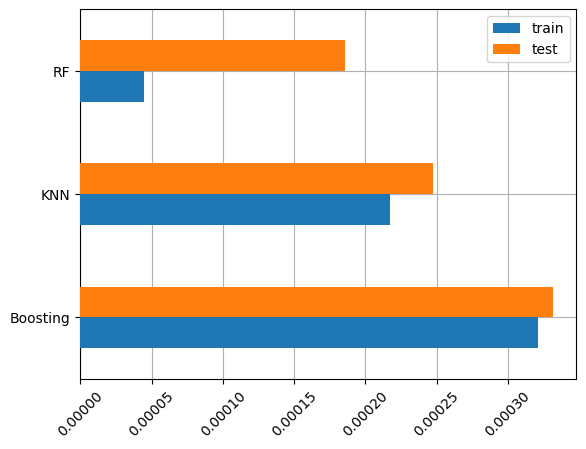

In [34]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)
plt.xticks(rotation=45)

In [35]:
# melihat nilai akurasi dari tiap model
from sklearn.metrics import accuracy_score

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung akurasi masing-masing algoritma pada data test
for name, model in model_dict.items():
    y_pred = model.predict(X_test)
    # Konversi prediksi menjadi kelas (bulatkan ke bilangan bulat terdekat)
    y_pred_class = np.round(y_pred).astype(int)
    accuracy = accuracy_score(y_test, y_pred_class)
    print(f"Akurasi {name}: {accuracy:.4f}")


Akurasi KNN: 0.8447
Akurasi RF: 0.8871
Akurasi Boosting: 0.6424


Setelah dibuat akurasinya dalam bentuk nilai, akurasi Random Forest menjadi yang terbesar dengan presentase 88,71%

Selanjutnya kita uji prediksinya menggunakan beberapa nilai dalam data

In [36]:
# Uji data
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)


,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
4743,1,0.9,1.0,0.9


Berdasarkan nilai akurasinya dan prediksinya, permodelan yang paling mendekati dengan hasil aslinya adalah Random Forest